In [7]:
import pandas as pd
import requests
# NYC Housing Eviction dataset
eviction_nyc = 'https://data.cityofnewyork.us/resource/6z8x-wfk4.json'

response = requests.get(eviction_nyc)
response.json()

[{'court_index_number': 'B322267/22',
  'docket_number': '413695',
  'eviction_address': '780 CONCOURSE VILLAGE WEST',
  'eviction_apt_num': '3C',
  'executed_date': '2023-06-21T00:00:00.000',
  'marshal_first_name': 'Richard',
  'marshal_last_name': 'McCoy',
  'residential_commercial_ind': 'Residential',
  'borough': 'BRONX',
  'eviction_zip': '10451',
  'ejectment': 'Not an Ejectment',
  'eviction_possession': 'Possession',
  'latitude': '40.823921',
  'longitude': '-73.922884',
  'community_board': '4',
  'council_district': '16',
  'census_tract': '61',
  'bin': '2002455',
  'bbl': '2024439080',
  'nta': 'East Concourse-Concourse Village'},
 {'court_index_number': '68731/18',
  'docket_number': '026270',
  'eviction_address': '92-08 HOLLAND AVENUE',
  'eviction_apt_num': 'C',
  'executed_date': '2018-11-30T00:00:00.000',
  'marshal_first_name': 'Gary',
  'marshal_last_name': 'Rose',
  'residential_commercial_ind': 'Residential',
  'borough': 'QUEENS',
  'eviction_zip': '11693',
  '

In [11]:
if response.status_code == 200:
    eviction_data = response.json()

df = pd.DataFrame(eviction_data)
df

,court_index_number,docket_number,eviction_address,eviction_apt_num,executed_date,marshal_first_name,marshal_last_name,residential_commercial_ind,borough,eviction_zip,ejectment,eviction_possession,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
0,B322267/22,413695,780 CONCOURSE VILLAGE WEST,3C,2023-06-21T00:00:00.000,Richard,McCoy,Residential,BRONX,10451,Not an Ejectment,Possession,40.823921,-73.922884,4,16,61,2002455,2024439080,East Concourse-Concourse Village
1,68731/18,026270,92-08 HOLLAND AVENUE,C,2018-11-30T00:00:00.000,Gary,Rose,Residential,QUEENS,11693,Not an Ejectment,Possession,40.585357,-73.814824,14,32,94203,4537203,4161350026,Hammels-Arverne-Edgemere
2,B304200/24,116181,20 WEST 190TH STREET,E4,2025-05-14T00:00:00.000,Ileana,Rivera,Residential,BRONX,10468,Not an Ejectment,Possession,40.864117,-73.901051,7,14,265,2014359,2032000014,Kingsbridge Heights
3,13623/17A,068310,345 CLASSON AVENUE,20B,2017-12-08T00:00:00.000,Justin,Grossman,Residential,BROOKLYN,11205,Not an Ejectment,Eviction,40.689387,-73.960094,3,35,233,3321865,3019380001,Bedford
4,57775/18A,090425,90-07 JAMAICA AVENUE,2F,2019-09-06T00:00:00.000,Justin,Grossman,Residential,QUEENS,11421,Not an Ejectment,Possession,40.692881,-73.854520,9,32,14,4182070,4088690034,Woodhaven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50025/18,095280,486 EAST 165TH ST,7E,2019-08-01T00:00:00.000,Henry,Daley,Residential,BRONX,10456,Not an Ejectment,Possession,40.826858,-73.908904,3,17,185,2000000,2023690012,Morrisania-Melrose
996,315438/22,003725,43-06 210TH STREET,3B,2023-05-19T00:00:00.000,David,Smith,Residential,QUEENS,11361,Not an Ejectment,Possession,40.760359,-73.773371,11,19,1467,4138183,4062800001,Bayside-Bayside Hills
997,B339785/23,113609,1265 WALTON AVE,3CN,2024-11-26T00:00:00.000,Ileana,Rivera,Residential,BRONX,10452,Not an Ejectment,Possession,40.836551,-73.918334,4,16,22101,2002967,2024810028,West Concourse
998,47882/17,473702,2979 MARION AVE,UNIT 6B,2017-11-09T00:00:00.000,Danny,Weinheim,Residential,BRONX,10458,Not an Ejectment,Possession,40.869431,-73.883551,7,11,415,2016744,2032920045,Bedford Park-Fordham North


/var/folders/rv/m6mr8y0n7ljgsqj97w8qd0680000gn/T/ipykernel_29357/70163853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


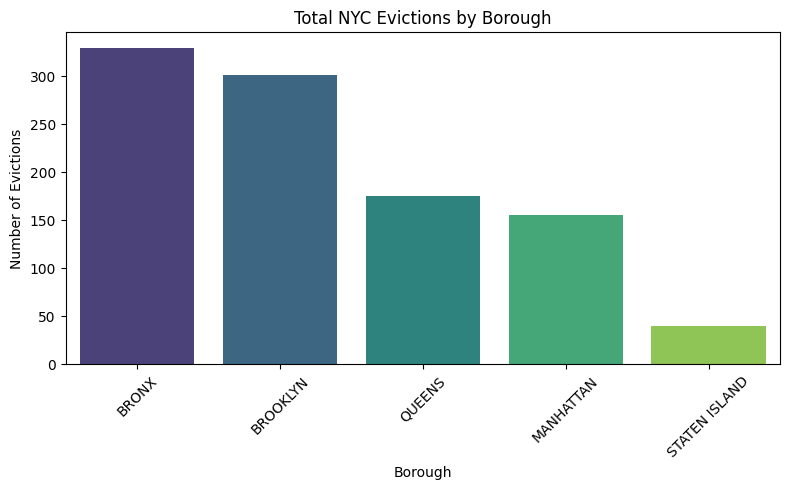

In [ ]:
#Testing a simple visualisation

import matplotlib.pyplot as plt
import seaborn as sns

evictions_by_borough = df["borough"].value_counts().reset_index()
evictions_by_borough.columns = ["Borough", "Total Evictions"]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=evictions_by_borough, x="Borough", y="Total Evictions", palette="viridis"
)
plt.title("Total NYC Evictions by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Evictions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

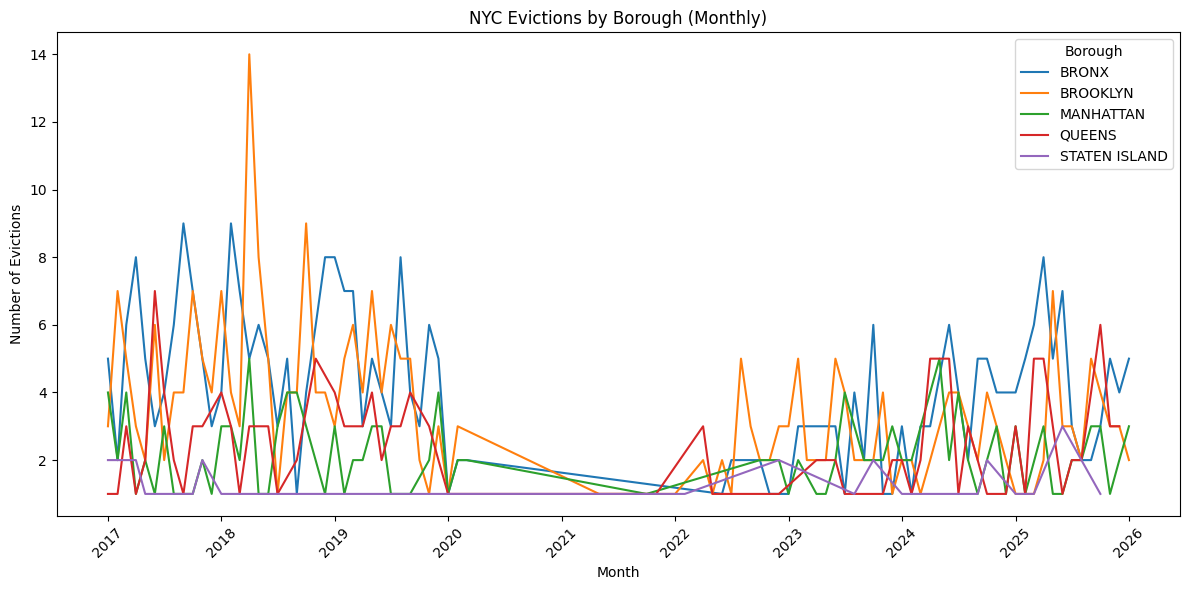

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime
df["executed_date"] = pd.to_datetime(df["executed_date"], errors="coerce")

# Create year-month period
df["year_month"] = df["executed_date"].dt.to_period("M")

evictions_month_borough = (
    df.groupby(["year_month", "borough"]).size().reset_index(name="total_evictions")
)

# Convert period to timestamp for plotting
evictions_month_borough["year_month"] = evictions_month_borough[
    "year_month"
].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=evictions_month_borough, x="year_month", y="total_evictions", hue="borough"
)

plt.title("NYC Evictions by Borough (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Evictions")
plt.xticks(rotation=45)
plt.legend(title="Borough")
plt.tight_layout()
plt.show()
